
# How well do jobs and skills pay for Data Analysts?
Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

In [4]:
#Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df_clean = df.dropna(subset=['salary_year_avg'])

In [6]:
top_6 = df_clean['job_title_short'].value_counts().index[:6].to_list()
df_top_6 = df_clean[df_clean['job_title_short'].isin(top_6)]
job_order = df_top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()

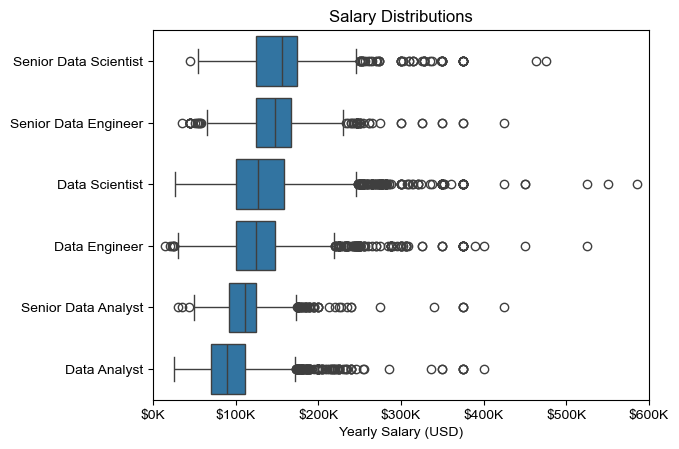

In [7]:
sns.boxplot(data=df_top_6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [8]:
df_DA = df_clean[df['job_title_short'] == 'Data Analyst'].copy()
df_DA_explode = df_DA.explode('job_skills')

C:\Users\pili_\AppData\Local\Temp\ipykernel_21184\3596661058.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_DA = df_clean[df['job_title_short'] == 'Data Analyst'].copy()


In [9]:
df_DA_top_pay = df_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


In [10]:
df_DA_most_demanded = df_DA_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_most_demanded = df_DA_most_demanded.head(10).sort_values(by='median', ascending=False)
df_DA_most_demanded

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


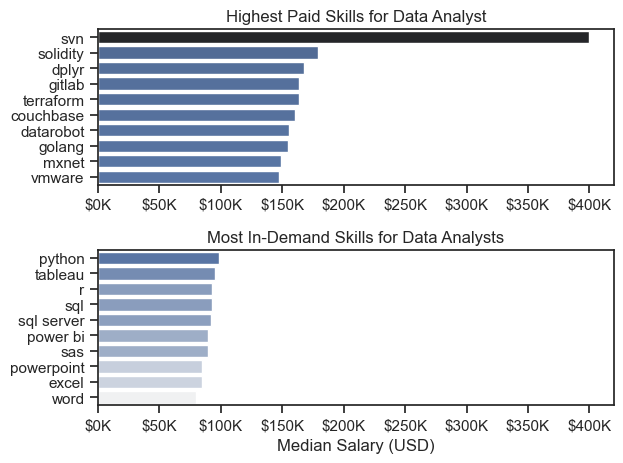

In [12]:
fig, ax = plt.subplots(2, 1)

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')

ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_most_demanded, x='median', y=df_DA_most_demanded.index, hue='median', ax=ax[1], palette='light:b')

ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show() 